In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from keras import backend as K

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
train_labelsH = np_utils.to_categorical(train_labels)
test_labelsH = np_utils.to_categorical(test_labels)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
img_rows=224
img_cols=224
nb_train_samples = 50000 # 3000 training samples
X_train = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in train_images[:nb_train_samples,:,:,:]])

In [ ]:
model = keras.models.Sequential([
    keras.Input(shape=(32, 32, 3)),
    keras.layers.Resizing(224,224),
    #keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_10 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_11 (Bat  (None, 26, 26, 256)     

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labelsH, epochs=20, batch_size=200, validation_data=(test_images, test_labelsH))
#model.fit(train_ds, epochs=50, validation_data=validation_ds, validation_freq=1)
#,
#          callbacks=[tensorboard_cb])

Epoch 1/20
250/250 [==============================] - 117s 419ms/step - loss: 2.6205 - accuracy: 0.3122 - val_loss: 2.4421 - val_accuracy: 0.2315
Epoch 2/20
250/250 [==============================] - 105s 420ms/step - loss: 1.4885 - accuracy: 0.4627 - val_loss: 1.8191 - val_accuracy: 0.3489
Epoch 3/20
250/250 [==============================] - 101s 405ms/step - loss: 1.3270 - accuracy: 0.5309 - val_loss: 1.3091 - val_accuracy: 0.5471
Epoch 4/20
250/250 [==============================] - 105s 421ms/step - loss: 1.1960 - accuracy: 0.5817 - val_loss: 1.3165 - val_accuracy: 0.5161
Epoch 5/20
250/250 [==============================] - 105s 422ms/step - loss: 1.0936 - accuracy: 0.6210 - val_loss: 1.3222 - val_accuracy: 0.5520
Epoch 6/20
250/250 [==============================] - 101s 406ms/step - loss: 0.9992 - accuracy: 0.6536 - val_loss: 1.1942 - val_accuracy: 0.5915
Epoch 7/20
250/250 [==============================] - 102s 407ms/step - loss: 0.9101 - accuracy: 0.6902 - val_loss: 1.5289 -

Di bawah ini adalah code yang lama


In [ ]:
#x_train = np.expand_dims(train_images, axis=-1)
#train_imagesN = tf.image.resize(train_images, (227,227))
#image = tf.image.resize(image, (227,227))
#x_train.shape
X_train = train_images.reshape(train_images.shape[0], 1, 28, 28).astype('float32')

ValueError: ignored

In [ ]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

In [ ]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [ ]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

In [ ]:
train_labelsH = np_utils.to_categorical(train_labels)
test_labelsH = np_utils.to_categorical(test_labels)

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", validation_ds_size)

Training data size: 45000
Test data size: 10000
Validation data size: 5000


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])

model.fit(train_images, train_labelsH, epochs=20, batch_size=200, validation_data=(test_images, test_labelsH))

Epoch 1/20
250/250 [==============================] - 6s 22ms/step - loss: 1.7571 - accuracy: 0.3486 - val_loss: 1.4350 - val_accuracy: 0.4720
Epoch 2/20
250/250 [==============================] - 5s 20ms/step - loss: 1.3682 - accuracy: 0.5040 - val_loss: 1.2847 - val_accuracy: 0.5369
Epoch 3/20
250/250 [==============================] - 5s 21ms/step - loss: 1.1960 - accuracy: 0.5694 - val_loss: 1.1562 - val_accuracy: 0.5955
Epoch 4/20
250/250 [==============================] - 5s 21ms/step - loss: 1.0613 - accuracy: 0.6228 - val_loss: 1.0915 - val_accuracy: 0.6161
Epoch 5/20
250/250 [==============================] - 5s 20ms/step - loss: 0.9619 - accuracy: 0.6621 - val_loss: 0.9656 - val_accuracy: 0.6597
Epoch 6/20
250/250 [==============================] - 5s 20ms/step - loss: 0.8944 - accuracy: 0.6871 - val_loss: 0.9313 - val_accuracy: 0.6759
Epoch 7/20
250/250 [==============================] - 5s 20ms/step - loss: 0.8175 - accuracy: 0.7135 - val_loss: 0.9123 - val_accuracy: 0.6827

In [ ]:
y_predict=model(test_images)

In [ ]:
np.round(y_predict[1])

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

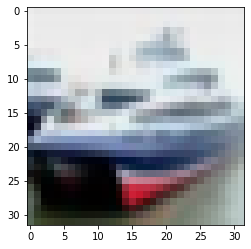

In [ ]:
plt.imshow(test_images[1])

In [ ]:
a=test_images[1]

In [ ]:
a.shape

(32, 32, 3)

In [ ]:
a2 = tf.image.resize(a, (227,227))

In [ ]:
a2.shape

TensorShape([227, 227, 3])

In [ ]:
test_images.shape

(10000, 32, 32, 3)

In [ ]:
a3=np.asarray(a2)

In [ ]:
a3.shape

(227, 227, 3)